# Задание 
1. Скачайте текст войны и мир (ссылка на github и гугл диск). 
  - Очистите его, оставив только русские буквы и символы пробела. 
  - Постройте матрицу переходных вероятностей. 
  - Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
  - Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов
2. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

# Новый раздел

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

### Подготовка текста

In [2]:
import glob

read_files = glob.glob('*.txt')

with open("result.txt", 'wb') as outfile:
  for f in read_files:
    with open(f, 'rb') as infile:
      outfile.write(infile.read())

In [3]:
with open('result.txt','r') as f:
  text = f.read().lower()
text = re.sub('[^а-я]','', text)

### Матрица переходных вероятностей

In [4]:
rus = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(rus)}

In [5]:
probabilities = np.zeros((len(rus), len(rus)))

In [6]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [8]:
df = pd.DataFrame(probabilities,index=(c for c in rus), columns=(c for c in rus))

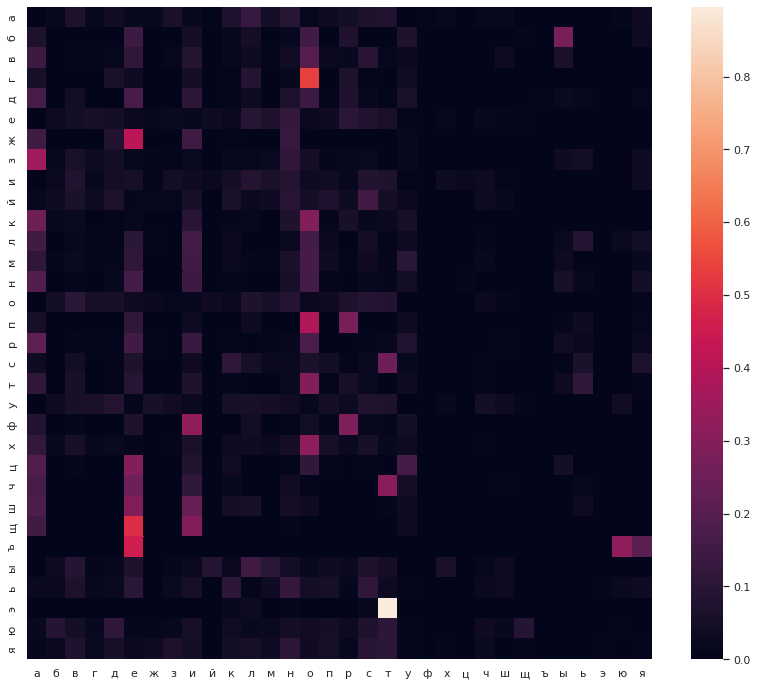

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(df)
plt.show()

### Вероятность встретить строку из 4-х символов

In [58]:
start = 1/len(probabilities[0])
probability = {}

for i in rus:
    for j in rus:
        prob = start * probabilities[POS['п'], POS [i]] * probabilities[POS[i], POS [j]] *  probabilities[POS[j], POS ['р']]
        if prob > 0:
            print(''.join(['п', i, j, 'р']), prob)

паар 2.952763532276986e-07
пабр 2.4016268436276977e-06
павр 2.3786130104396397e-06
пагр 2.2406818409350598e-06
падр 4.822702560463816e-06
паер 3.4322116046994304e-06
пажр 1.6632436987482908e-08
пазр 1.7047458715109561e-06
паир 6.144184460687957e-07
пайр 5.131832560571741e-07
пакр 7.38084636400584e-06
палр 1.1667544929521426e-06
памр 7.000990990761239e-07
панр 4.5707480676798933e-07
паор 2.046388515355872e-06
папр 1.629915005047451e-05
парр 9.667707293653074e-08
паср 1.1730666379570801e-06
патр 7.346398037138124e-06
паур 3.4602582507541646e-07
пафр 4.259101196901028e-06
пахр 6.787809342832164e-07
пацр 5.257700033218561e-09
пачр 6.633322342548735e-08
пашр 1.661403402722615e-08
пащр 7.599601081135946e-09
паэр 4.8698530977879084e-08
паюр 5.661781062192253e-07
паяр 9.308529040084142e-07
пбар 3.3649614804945927e-09
пббр 8.321707269593375e-11
пбвр 1.2051632659238555e-10
пбгр 5.567707694022303e-11
пбдр 1.2733663341845052e-10
пбер 1.4574546825890992e-08
пбжр 2.640324713600072e-13
пбзр 3.8778641

### Генерация слова, начинающееся с буквы “Б” и имеющее длину 8 символов

In [57]:
s=['б']
start = np.random.choice(list(rus))
s.append(start)
length = 6

for i in range(length):
  index = POS[s[i]]
  next_char = np.random.choice(list(rus), p = probabilities[index])
  s.append(next_char)
print (''.join(s))

бэутгодб


### HMM

In [17]:
!pip install hmmlearn

     |████████████████████████████████| 374 kB 4.2 MB/s 


In [19]:
from hmmlearn.hmm import GaussianHMM

In [20]:
series = pd.read_csv('international-airline-passengers.csv')['Count']

In [21]:
values = series.values.reshape(-1,1)

In [63]:
optimal_n = []

for i in range(1,16):
  model = GaussianHMM(n_components=i,
                      covariance_type='diag',
                      n_iter=1000)
  model.fit(values)
  optimal_n.append(model.score(values))
  print(i, model.score(values))

1 -893.1837902090575
2 -803.8479638762088
3 -767.0819417008181
4 -743.9977519551936
5 -731.3641510668381
6 -706.6076959308647
7 -694.994865502627
8 -673.9336800691156
9 -664.2465557766131
10 -656.1684316480489


Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.


11 -650.2620800745817


Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.


12 -644.6129988457616


Fitting a model with 223 free scalar parameters with only 144 data points will result in a degenerate solution.


13 -639.3145520193685


Fitting a model with 254 free scalar parameters with only 144 data points will result in a degenerate solution.


14 -633.3860900573915
15 -630.5079622662607


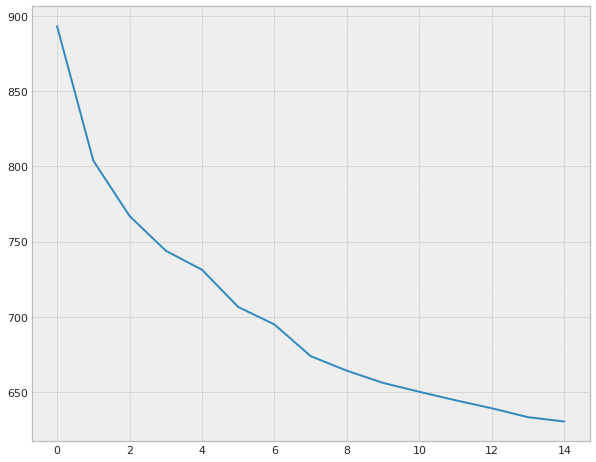

In [64]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,8))
    plt.plot(optimal_n*np.array([-1]))

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

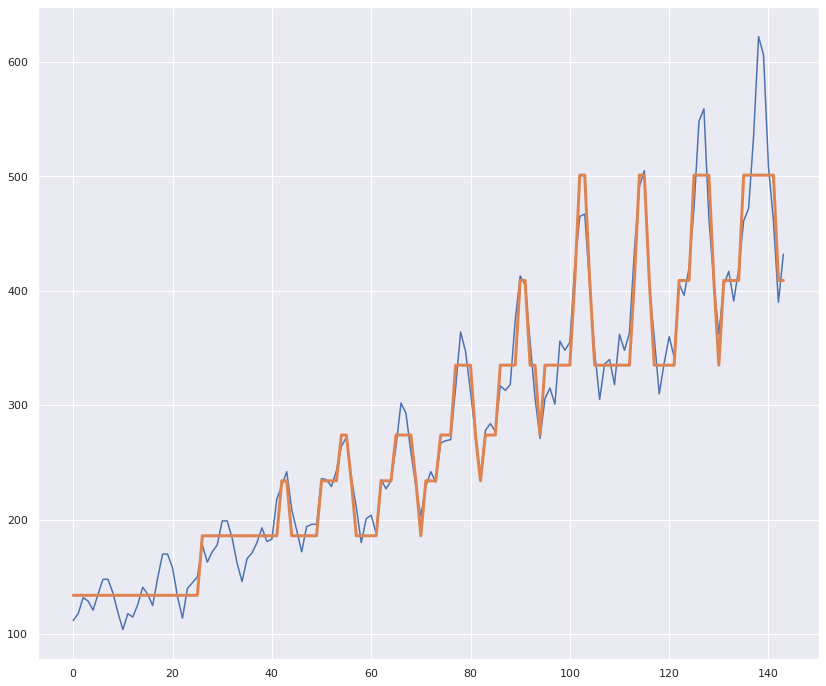

In [65]:
model = GaussianHMM(n_components=7, 
                    covariance_type='diag',
                    n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
  means[labels == i] = model.means_[i]

  plt.figure(figsize=(14, 12))
plt.plot(values)
plt.plot(means, linewidth=3)

In [46]:
model.transmat_.shape

(7, 7)

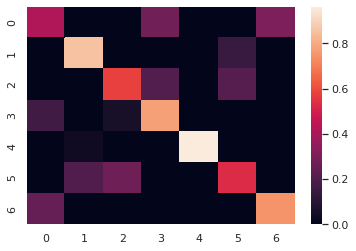

In [47]:
sns.heatmap(model.transmat_)